In [69]:
# importations des différentes librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pickle

In [2]:
# df : dfframe c'est l'ensemble du jeu des données
df = pd.read_csv('dataset\Healthcare-Diabetes.csv', sep=",")

In [3]:
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [15]:
# suppression de la colonne id
df=df.drop('Id', axis=1)

In [16]:
df.shape

(2768, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df.duplicated().sum()

1990

In [21]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,1816,1816,1816,1816,1816,1816,1816,1816
1,952,952,952,952,952,952,952,952


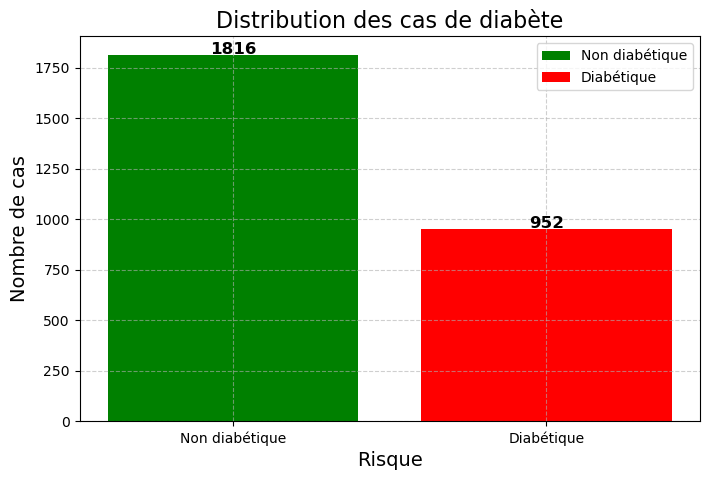

In [22]:

# Compter les occurrences pour chaque classe
Classifier = df['Outcome'].value_counts()

color = {0:'green', 1:'red' }

# Créer le graphique
plt.figure(figsize=(8, 5))

# Boucle pour créer chaque barre et ajouter les labels
for i, (label, y) in enumerate(Classifier.items()):
    plt.bar(x=label, height=y,color=color[label],label='Diabétique' if label == 1 else 'Non diabétique')
    plt.text(x=label, y=y + 5, s=str(y), ha='center', fontsize=12, fontweight='bold')

# Ajouter le titre et les axes
plt.title('Distribution des cas de diabète', fontsize=16)
plt.xlabel("Risque", fontsize=14)
plt.ylabel("Nombre de cas", fontsize=14)
plt.xticks([0, 1], labels=['Non diabétique', 'Diabétique'])
plt.grid(True, linestyle='--', alpha=0.6)

# Ajouter la légende
plt.legend()

# Afficher le graphique
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


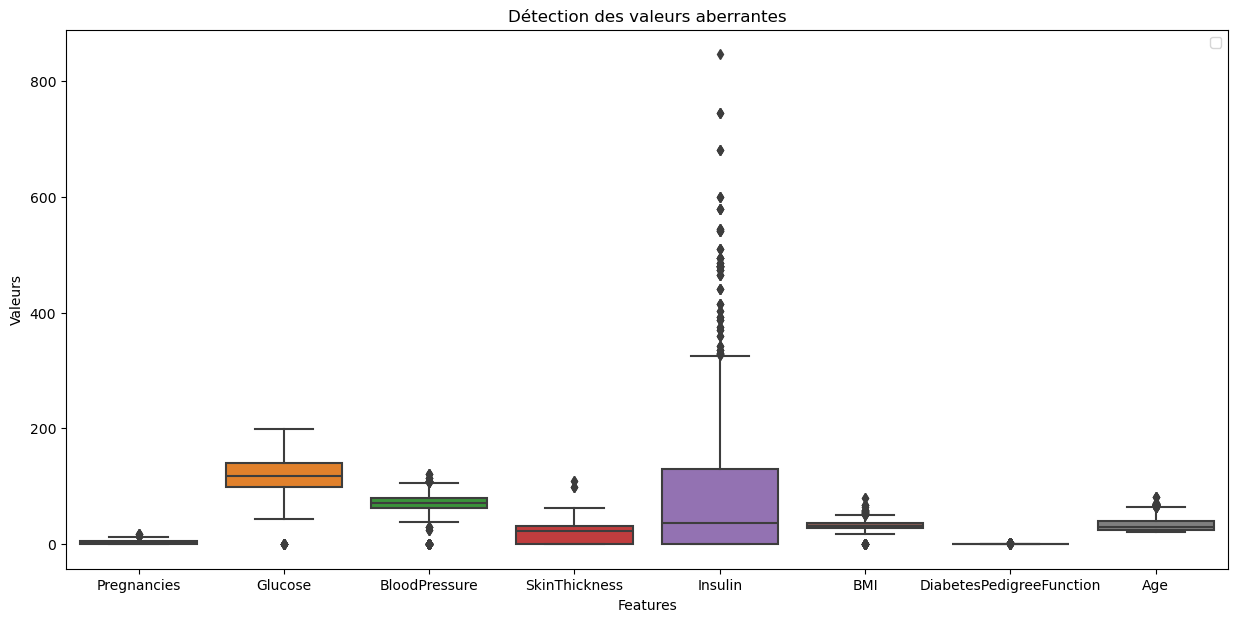

In [23]:
plt.figure(figsize=(15,7))
sn.boxplot(df.iloc[:,:-1])
plt.title("Détection des valeurs aberrantes")
plt.xlabel('Features')
plt.ylabel('Valeurs')
plt.legend() 
plt.show()

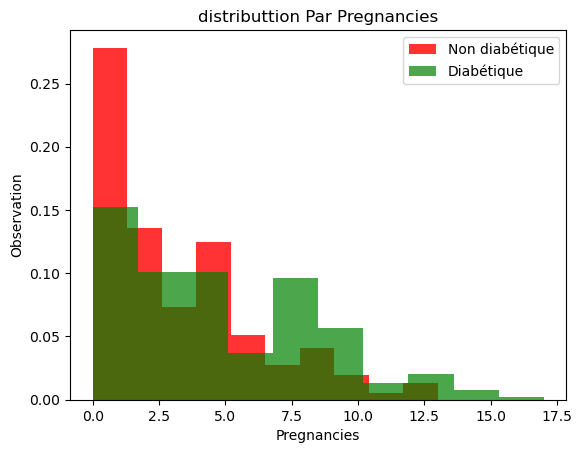

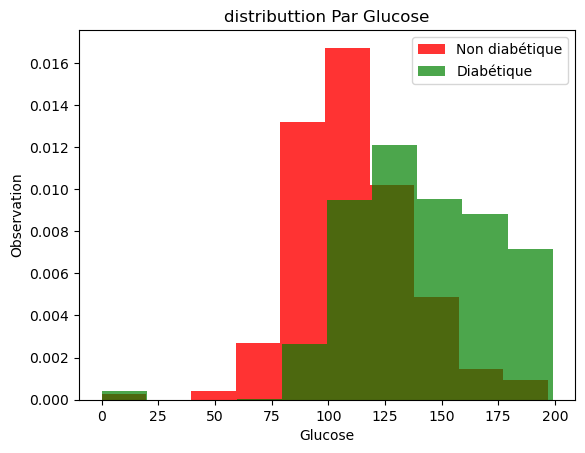

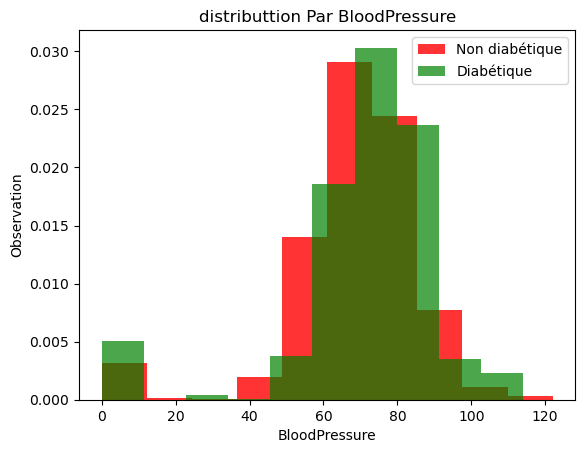

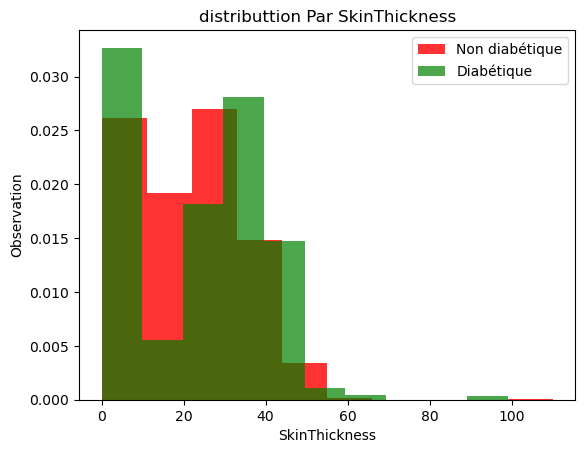

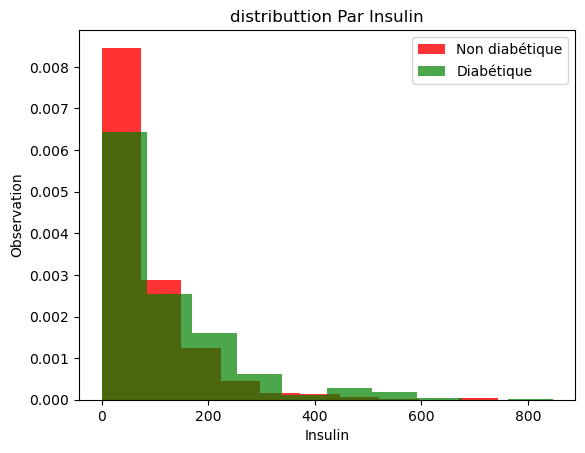

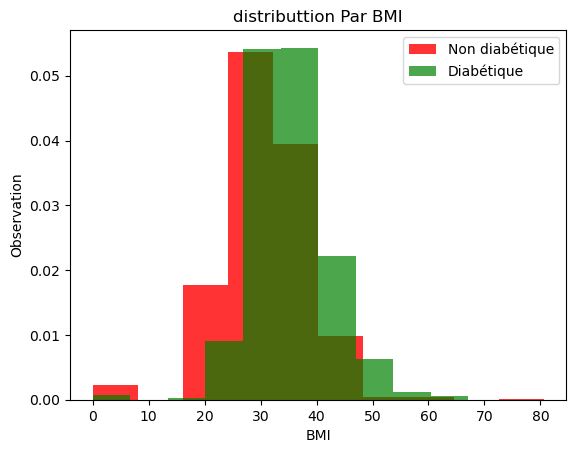

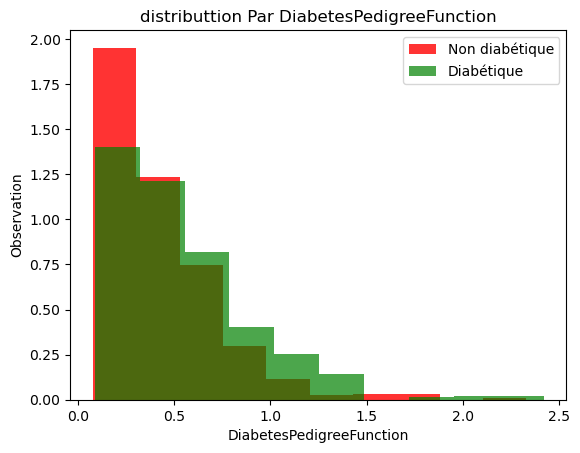

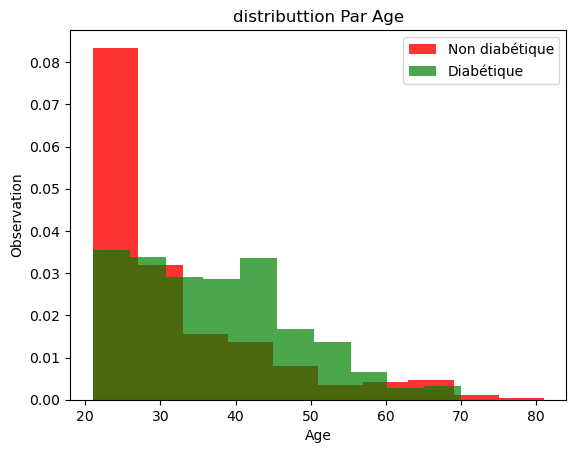

In [25]:
risk= ['Non diabétique', 'Diabétique']
for  label in df.columns[:-1]:
    plt.hist(df[df['Outcome']==0][label], label=risk[0], color="red", histtype='bar', alpha=0.8, density=True)
    plt.hist(df[df['Outcome']==1][label], label=risk[1], color="green", histtype='bar', alpha=0.7, density=True)
    plt.title(f'distributtion Par {label}')
    plt.xlabel(label)
    plt.ylabel('Observation')
    plt.legend()
    plt.show()

In [27]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


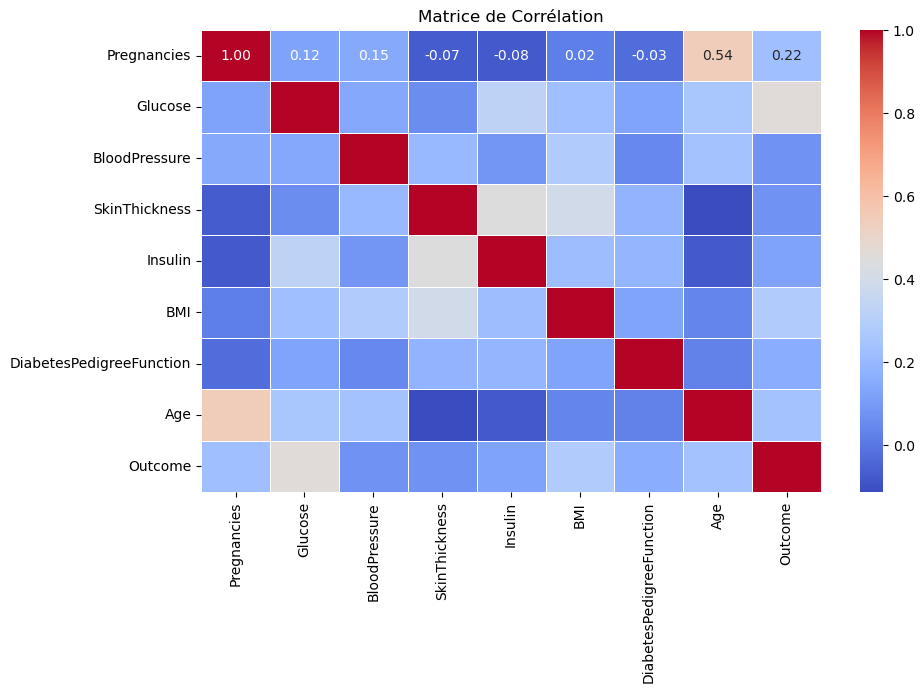

In [26]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer la heatmap
sn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajouter le titre
plt.title('Matrice de Corrélation')

# Afficher la heatmap
plt.show()


In [28]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw , uw

In [29]:
for i in df.select_dtypes(include="number").columns:
    lw , uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw , df[i])
    df[i] = np.where(df[i] > uw, uw , df[i])

In [31]:
x = df.drop(columns='Outcome') #features
y= df['Outcome'] #target

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)  
# 80% => données d'entrainements
#20% => données de tests

In [34]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    Scaler = StandardScaler()
    x = Scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)

    data = np.hstack((x , np.reshape(y, (-1,1))))
    

    return data , x , y, Scaler
    

In [35]:
train= np.hstack((x_train , np.reshape(y_train, (-1,1))))
test= np.hstack((x_test , np.reshape(y_test, (-1,1))))

In [36]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [37]:
train , x_train , y_train, scaler = scale_dataset(train, oversample=True)
test , x_test, y_test, scaler = scale_dataset(test, oversample=False)

In [43]:
pd.DataFrame(y_train)[0].unique()

array([0., 1.])

In [44]:
Svm_model = SVC()

In [45]:
Svm_model.fit(x_train,y_train)

SVC()

In [46]:
y_pred_svm=Svm_model.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred_svm)


0.8357400722021661

In [49]:
Lr_model = LogisticRegression(max_iter=100)
Lr_model.fit(x_train,y_train)
y_pred_Lr=Lr_model.predict(x_test)
accuracy_score(y_test,y_pred_Lr)

0.7472924187725631

In [50]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(x_train,y_train)
y_pred_knn = Knn_model.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.8790613718411552

In [57]:
from sklearn.tree import DecisionTreeClassifier
Dt_model = DecisionTreeClassifier()

In [58]:
Dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred_Dt = Dt_model.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred_Dt)

0.8772563176895307

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
Rf_model= RandomForestClassifier(random_state=0)

In [62]:
Rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [63]:
y_pred_Rf = Rf_model.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred_Rf)

0.9765342960288809

In [68]:
rapport_Dt = classification_report(y_test,y_pred_Rf)
print(rapport_Dt)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       374
         1.0       0.98      0.95      0.96       180

    accuracy                           0.98       554
   macro avg       0.98      0.97      0.97       554
weighted avg       0.98      0.98      0.98       554



In [ ]:
path ="model/diabetesV1.sav"
path_scale ="model/scale1.sav"
pickle.dump(Rf_model,open(path,'wb'))
pickle.dump(scaler,open(path_scale, 'wb') )